# Домашнее задание №5

Задание выполнил(а): `(впишите свои фамилию и имя)`

### Общая информация

__Дедлайн:__ 31.07.2022 23:30


### О задании

Часть 1 содержит практическое задание на применение методов KMeans и DBSCAN.

Часть 2 содержит практическое задание на реализацию метода KMeans.

Часть 3 содержит практическое задание на снижение размерности с помощью PCA и кластеризацию табличных данных.


### Оценивание и штрафы


#### 1. k-means and DBSCAN на картинках [4 балла]
* [Задание 1](#task1) [2 балла]
* [Задание 2](#task2) [1 балл]
* [Задание 3](#task3) [1 балл]

#### 2. k-means своими руками [4 балла]
* [Задание 1](#task2_1) [1 балл]
* [Задание 2](#task2_2) [3 балла]

#### 3. PCA + кластеризация [6 баллов]
* [Задание 1](#task3_1) [1 балл]
* [Задание 2](#task3_2) [1 балл]
* [Задание 3](#task3_3) [1 балл]
* [Задание 4](#task3_4) [1 балл]
* [Задание 5](#task3_5) [2 балла]

Итоговая оценка за домашнюю работу вычисляется по формуле: $$s \cdot \frac{10}{14},$$ где $s$ - сумма набранных балов. 

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день (от оценки в 10 бальной шкале), но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/course/1029). 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = (8, 5)
%matplotlib inline

# Часть 1. Кластеризация цифр.

В этом задании вам нужно будет кластеризовать изображения цифр. В данном случае одна картинка - это один объект (признаков столько, сколько на картинке пикселей).

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
digits = digits["data"]

Число объектов и признаков:

In [5]:
digits.shape

(1797, 64)

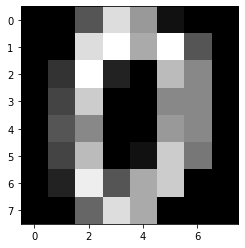

In [6]:
# Каждый объект - изображение цифры размеров 8 x 8
plt.imshow(digits[0].reshape(8, 8), cmap="gray")
plt.show()

In [7]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

### Задание 1 [2 балла] <a id="task1"></a>

Кластеризуйте цифры методами кластеризации k-means ([`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)) и DBSCAN ([`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)). Измерьте качество кластеризации с помощью метрики Silhouette Coefficient ([`sklearn.metrics.silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)).

In [16]:
# your code here

### Задание 2 [1 балл] <a id="task2"></a>

Для кластеризации методом k-means визуализируйте картинки - центры кластеров (метод `.cluster_centers_` у KMeans).

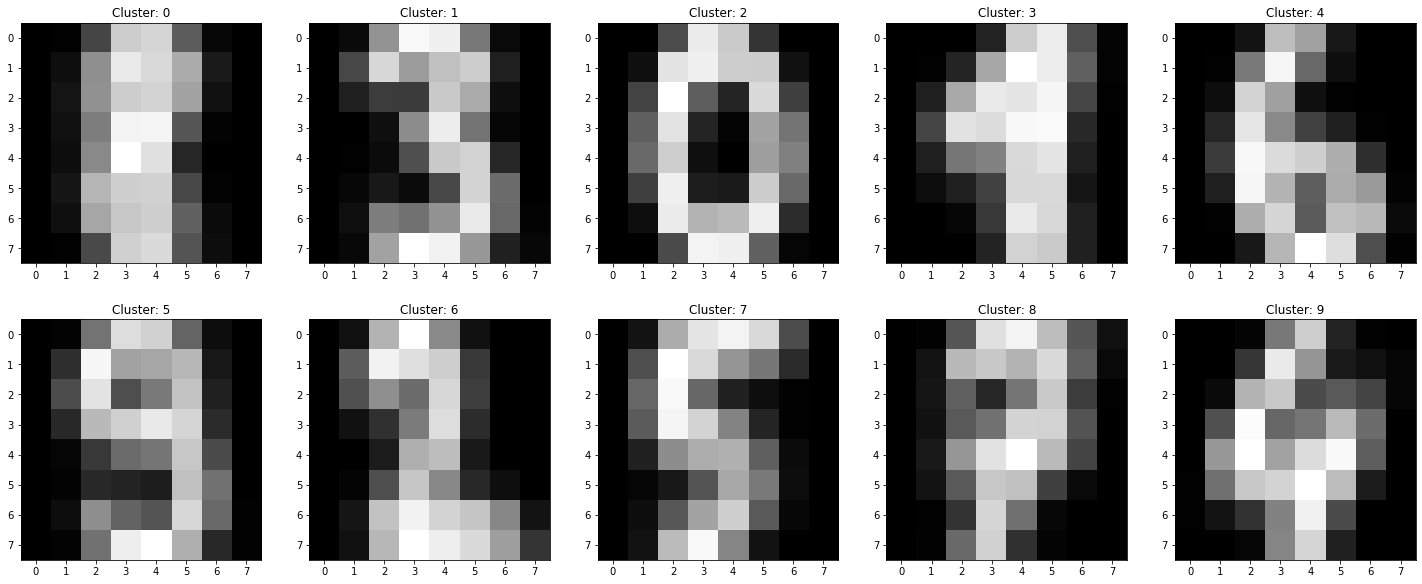

In [21]:
# your code here

### Задание 3 [1 балл] <a id="task3"></a>

Для кластеризации методом DBSCAN выведите три случайно выбранные картинки из каждого кластера.

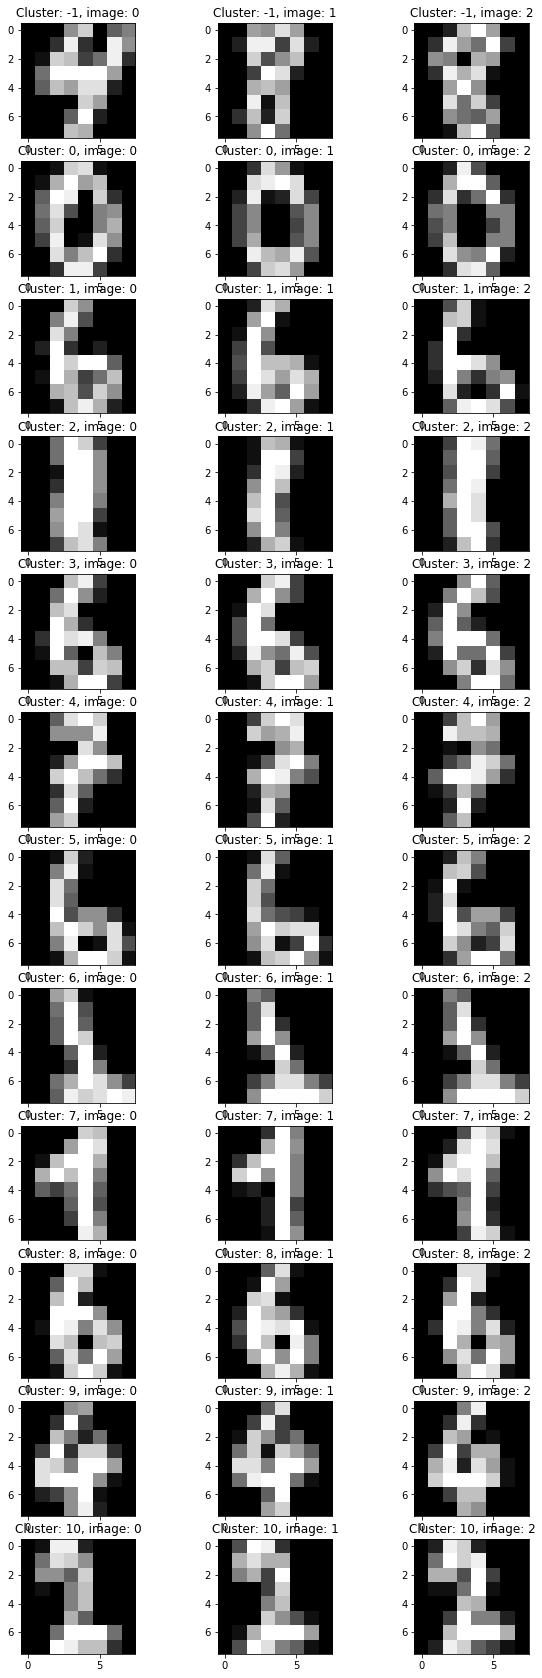

In [22]:
# your code here

# Часть 2. K-means своими руками

В этом задании вам нужно будет реализовать алгоритм K-Means. Для этого потребуется:

- следовать инструкциям
- воспользоваться базовыми техниками `numpy`
- понимание, что происходит в алгоритме K-Means

Сгенерируем случайную выборку. Матрица объекты-признаки находится в переменной $X$.

In [8]:
np.random.seed(13)
X1 = np.random.randn(100,2)
X2 = np.random.randn(100,2) - np.array([10,1])
X3 = np.random.randn(100,2) - np.array([1,10])
X = np.vstack((X1,X2,X3))

Визуализируем выборку:

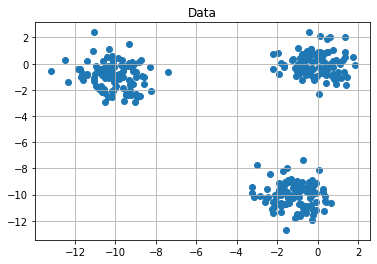

In [12]:
plt.scatter(X[:,0], X[:,1])
plt.title('Data')
plt.grid();

### Задание 1 [1 балл] <a id="task2_1"></a>

Чтобы реализовать алгоритм K-Means, нам понадобится вспомогательная функция. В процессе работы алгоритма мы все время обновляем значение целевой переменной для каждого объекта - то есть на каждом шаге вычисляем, к какому кластеру он относится. На каждом шаге нам известно, где находятся центры кластеров, так что задача - для каждого объекта посчитать расстояние до центров кластеров и выбрать ближайший из них в качестве ответа.

На практике это удобно сделать с помощью функции [`sklearn.metrics.pairwise_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html). Она может принимать на вход два массива $X$ и $Y$, а на выходе предоставить матрицу расстояний, где в $i$-ой строке и $j$-ом столбце стоит расстояние между $i$-ым объектом в $X$ и $j$-ым объектом в $Y$.

Не воспрещается и реализовать это как-то по-другому.

Также в процессе вам возможно понадобится функция `np.argmin` (не забудьте про параметр `axis`!).

In [13]:
from sklearn.metrics import pairwise_distances

In [6]:
def compute_clusters(X, centers):
    """
    INPUT:
    X - np.array, (n_objects x n_features) - матрица объекты-признаки
    centers - np.array, (n_clusters x n_features) - матрица, содержащая координаты центров кластеров
    
    OUTPUT:
    y - np.array, (n_objects,) - вектор, состоящий из меток кластеров (0, 1, ..., n_clusters-1), где
    на i-ом месте стоит метка кластера для i-ого объекта выборки X
    """
    # your code here
    return y

In [ ]:
# check yourself
centers = (np.arange(6)*0.05).reshape(3, 2)
assert np.allclose(
    compute_clusters(X, centers), 
    np.array([0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
)

### Задание 2 [3 балла] <a id="task2_2"></a>

Реализуйте класс KMeans, обладающий методами `fit` (находит оптимальные центры кластеров) и `transform` (вычисляет, к какому кластеру относятся каждый объект выборки).

Метод `fit`:

1. Посчитайте, сколько объектов и признаков есть в выборке. **(0.33 балла)**
2. Инициализируйте $y$ - вектор длины `n_objects` (число объектов в выборке $X$), хранящий изначальные метки кластеров для объектов (можно воспользоваться функциями `np.empty`, `np.random.randint` или какими-то другими). **(0.33 балла)**
3. Создайте матрицу для хранения центров кластеров (размера `n_clusters x n_features`) - можно заполнить ее нулями. **(0.33 балла)**
4. На каждой итерации обновите центры кластеров. То есть для каждого кластера посчитайте центр тяжести по формуле ниже и переместите центр кластера туда:
$$
c_j = \frac{\sum\limits_{x \in C^j}x}{|C^j| + \varepsilon},
$$
где $c_j$ - центр тяжести, $C^j$ - кластер, $x$ - объект из кластера $C^j$ (вектор - в сумме мы просто складываем их координаты), $|C^j|$ - число объектов в кластере $C^j$, $\varepsilon$ - какое-то очень маленькое число (например, $10^{-6}$) для стабильности - чтобы мы не поделили на $0$, если в кластере $C^j$ нет объектов. Возможно, в этом задании вам понадобятся функции `sum`, `mean` - не забывайте про параметр `axis`! **(1 балл)**
5. После перемещения центров кластеров в центры тяжести обновите $y$ - чтобы отнести объекты к кластерам с пересчитанными центрами. Каждый объект будет относиться к тому кластеру, расстояние от центра которого до объекта наименьшее. (Вот тут вам понадобится функция `compute_clusters`). **(0.5 балл)**

Метод `transform`:

1. Для выборки $X$ посчитайте, к какому из найденных кластеров (с центрами в `self.centers`) относится каждый объект. Здесь вам тоже понадобится функция `compute_clusters`). **(0.5 балла)**.

In [7]:
class KMeans:
    def __init__(self, n_clusters):
        # гиперпараметр - количество кластеров
        self.n_clusters = n_clusters
        
    def fit(self, X, max_iter=10, visualize=False):
        """
        INPUT:
        X - np.array, (n_objects x n_features) - матрица объекты-признаки
        max_iter - int - максимальное число итераций
        visualize - bool - визуализировать ли объекты и центры кластеров на каждой итерации 
        """
        # Цель: обучить центры кластеров self.centers, форма: число кластеров x число признаков
        
        # Шаг 1: сколько объектов и признаков?
        num_obj = # your code here
        num_feat = # your code here
        
        # Шаг 2: инициализируйте y - вектор длины n_objects, 
        # хранящий, к какому кластеру относится каждый объект
        # каждый элемент - случайно выбранный номер кластера 
        y = # your code here
        
        # Шаг 3: создайте матрицу для хранения центров кластеров
        self.centers = # your code here
        
        for n_iter in range(max_iter):
            # Шаг 4: обновите центры кластеров
            for cl in range(self.n_clusters):
                self.centers[cl] = # your code here
            
            # Шаг 5: обновите y. Для этого вычислите расстояния между всеми объектами 
            # и центрами кластеров (используйте pairwise_distances), 
            # затем найдите ближайший к каждому объекту кластер
            
            y = # your code here
            
            # Поддержка флага visualize
            if visualize:
                plt.figure(figsize=(5,5))
                plt.scatter(X[:, 0], X[:, 1], c=y)
                plt.scatter(self.centers[:, 0], self.centers[:, 1], c='red', marker='x')
                plt.title('Step {}'.format(n_iter + 1))
                plt.show()
    
    def transform(self, X):
        """
        INPUT:
        X - np.array, (n_objects x n_features) - матрица объекты-признаки
        
        OUTPUT:
        y_pred - np.array, (n_objects,) - вектор, состоящий из меток кластеров (0, 1, ..., self.n_clusters-1), где
    на i-ом месте стоит метка кластера для i-ого объекта выборки X
        """        
        # your code here
        return y_pred

In [1]:
km = KMeans(3)
km.fit(X, visualize=True)
y = km.transform(X)

Итоговая кластеризация:

In [2]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Часть 3. Снижение размерности и Кластеризация

Мы будем работать с набором данных [Samsung Human Activity Recognition](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones). Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3, также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице.

Представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей только на основе имеющихся данных акселератора.

In [14]:
X = pd.read_csv('samsung_data.csv')
y = pd.read_csv('samsung_labels.csv')

In [15]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [16]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

Эти метки соответствуют:

1 - ходьбе,
2 - подъему вверх по лестнице,
3 - спуску по лестнице,
4 - сидению,
5 - стоянию,
6 - лежанию

### Задание 1 [1 балл] <a id="task3_1"></a>

Отмасштабируйте выборку с помощью StandardScaler. 

In [119]:
# your code here

### Задание 2 [1 балл] <a id="task3_2"></a>

Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Используйте отмасштабированную выборку и зафиксируйте random_state.

**Hint:** Напомним, что у PCA есть атрибут `explained_variance_ratio_`

In [17]:
# your code here

### Задание 3 [1 балл] <a id="task3_3"></a>


Визуализируйте данные (scatter plot) в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с настоящими классами (`y`).

In [18]:
# your code here

### Задание 4 [1 балл] <a id="task3_4"></a>


Сделайте кластеризацию данных методом KMeans, обучив модель на данных со сниженной за счет PCA размерностью. В данном случае нужно искать 6 кластеров (так как у нас 6 классов). 

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

In [19]:
# your code here

### Задание 5 [2 балла] <a id="task3_5"></a>


Сделайте кластеризацию данных методом DBSCAN. Подберите гипераметры `eps` и `min_samples` максимизируя метрику `silhouette_score`. Обучайте модель на данных со сниженной за счет PCA размерностью. Ваша цель получить модель с `silhouette_score` 0.47 или больше.

Сравните лучшую модель c k-means в терминать `silhouette_score`.

In [227]:
# YOUR CODE HERE

In [ ]:
# YOUR CODE HERE: score for the best DBSCAN MODEL

In [ ]:
# YOUR CODE HERE: score for the  k-means MODEL

# БОНУСНЫЙ БЛОК (10 БАЛЛОВ)


### О задании

Часть 1 содержит практическое задание на применение метода главных компонент.

Часть 2 содержит практическое задание на применение метода One-Class SVM.


### Оценивание и штрафы


#### 1. Метод главных компонент [5 баллов]
* [Задание 1](#task1) [2 балла]
* [Задание 2](#task2) [2 балл]
* [Задание 3](#task3) [1 балл]

#### 2. One-Class SVM [5 баллов]
* [Задание 1](#task2_1) [1 балл]
* [Задание 2](#task2_2) [1 балл]
* [Задание 3](#task2_3) [3 балла]


In [ ]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

np.random.seed(0)

# Часть 1. Детектирование аномалий на основе метода главных компонент
В файле Abilebe.mat представлены данные о трафике (количество байт в единицу времени) в сети Abilene для трех недель. Загрузим данные и посмотрим на ключи словаря.

In [2]:
data = io.loadmat('Abilene.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'odnames', 'X2', 'utc2', 'X3', 'utc3', 'X4', 'utc4'])

Словарь содержит:
+ матрицы X2, X3 и X4 с информацией о трафике между 121 парами “адресат-получатель” для каждой из трех недель
+ odnames с названиями всех пар “адресат-получатель”
+ вектора utc2; utc3, и utc4, содержащие моменты времени в формате UTC (в секундах), для которых были измерены значения трафика между рассмотренными парами “адресат-получатель”

Нас интересует информация о трафике: хотелось бы реагировать на аномальные события в сети. Давайте попробуем оценить визуально.

In [3]:
X2 = data['X2']
X3 = data['X3']
X4 = data['X4']

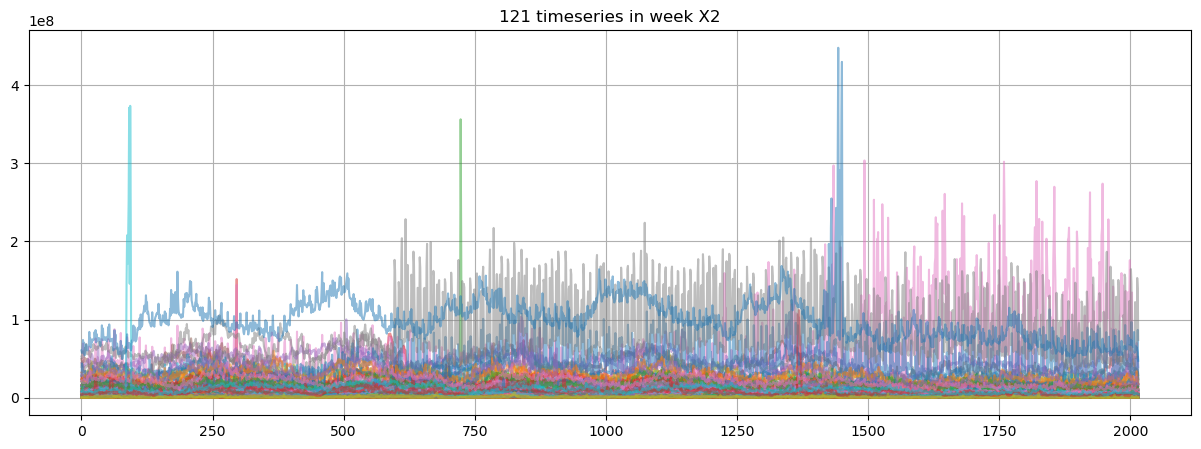

In [4]:
plt.figure(figsize=(15,5))
plt.plot(X2, alpha=0.5);
plt.title('121 timeseries in week X2')
plt.grid(True)

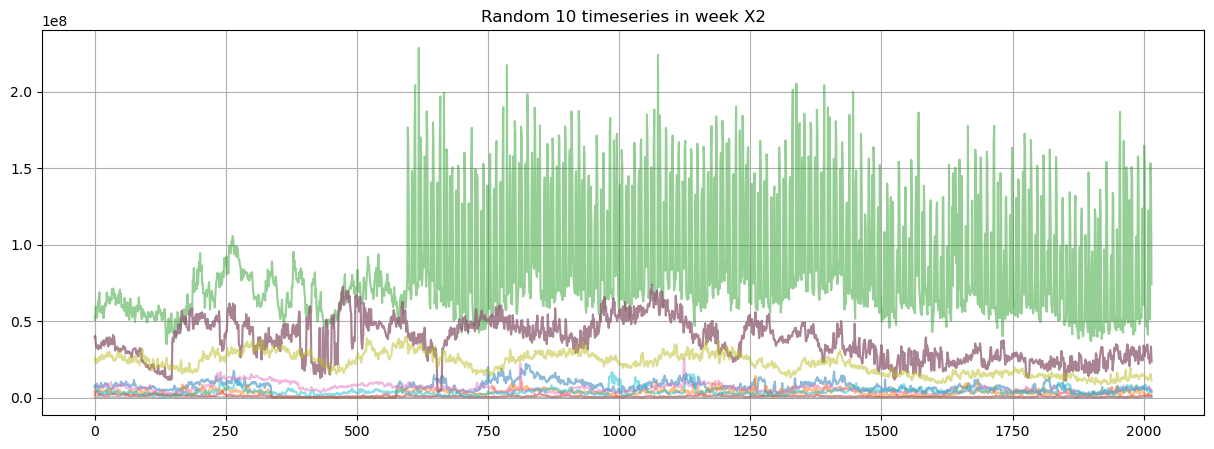

In [5]:
idx = np.random.randint(0, 121, 10)
plt.figure(figsize=(15,5))
plt.plot(X2[:,idx], alpha=0.5);
plt.title('Random 10 timeseries in week X2')
plt.grid(True)

У нас слишком много рядов (высокая размерность данных 121) и их диапозоны значений довольно разные! Однако, видна какая-то структура. Это дает надежду на успешное снижение размерности задачи методом главных компонент. Предлагается использовать следующий алгоритм:
1. Оценить операторы сжатия и восстановления по компонентам второй недели (тренеровочная выборка)
2. Критерий аномальности наблюдения: слишком большая ошибка восстановления после сжатия 

### Задание 1 [2 балла] <a id="task1"></a>
Вспомнить детали реализации алгоритма главных компонент (https://arxiv.org/pdf/1404.1100.pdf) и получить оператор сжатия.

Оценки будут производиться по главным компонентам **второй** недели

In [ ]:
X2_mean = # your code here
U, s, V = # your code here
X2_based_pc = # your code here

Подсчитаем метрику $\rho := $ какую долю дисперсии данных в каждую из трех недель (по отдельности) объясняют первые $d$ главных компонент, оценненые по первой неделе. 

Пусть 
 - $X$ матрица $121 \times 2016$ для которой нужно оценить такую метрику
 - $\overline{X}$ вектор средних по строкам
 - $U$ первые $d$ главных компонент, оценненые по первой неделе
 - $Z(X) = U^T(X2 - \overline{X2})$ преобразование сжатия 
 
Тогда 

$$
\rho(X) = \dfrac{\operatorname{trace}(Z - \overline{Z})(Z - \overline{Z})^T}{\operatorname{trace}(X - \overline{X})(X - \overline{X})^T} 
$$
 

Преобразование сжатия:

In [ ]:
def compression_operator(X, mean_pc, based_pc, number_pc):
    # your code here

def rho(X, mean_pc, based_pc, number_pc):
    # your code here
    if number_pc == 1:
        explained_var = # your code here
    else:
        explained_var = # your code here
    total_var = # your code here
    return explained_var / total_var

### Задание 2 [2 балла] <a id="task2"></a>
Подсчитать, какую долю дисперсии данных в каждую из трех
недель (по отдельности) объясняют первые d главных компонент (график зависимости $\rho$ от d), если главные компоненты были оценены по данным первой недели.

In [ ]:
X2_var, = # your code here
X3_var, = # your code here
X4_var, = # your code here

plt.legend(handles=[X2_var, X3_var, X4_var], loc='best')
plt.axis('tight');
plt.grid();

Выпишем преобразование восстановления для $X$:

$$\hat{X} = \overline{X2} + UZ(X)$$

где $Z(X)$ - преобразование сжатия из прошлого задания.

In [ ]:
def decompression_operator(compressed_X, mean_pc, based_pc, number_pc):
    # your code here

In [ ]:
def residual_matrix(X, mean_pc, based_pc, number_pc):
    # your code here

### Задание 3 [2 балла] <a id="task3"></a>
Нарисовать график зависимости статистики $Q = (x - \hat x)^T(x - \hat x)$ ( https://www.ltu.se/cms_fs/1.51590!/pca_part%201_jackson_1980.pdf, интересующая формула: 31) от времени для каждой из трех недель по отдельности, при этом главные компоненты оценивать по данным первой недели, параметр d выбрать по результатам анализа зависимости доли диперсии от значения d для данных первой
недели.

*Заметим*: Статистика $Q$ тогда в момент времени $t$ это квадрат нормы строки $t$ матрицы $X-\hat{X}$

In [ ]:
def q_stat(residuals, moment):
    # your code here

Зафиксируем число компонет, с которым будем работать:

In [ ]:
def broken_stick_pc_number_select(X):
    X_mean = # your code here
    U, s, V = # your code here
    
    s = s ** 2 / float(np.sum(s ** 2))
    broken_stick = np.array([np.sum(1.0 / np.arange(1, 122)[i:]) for i in range(121)]) / 121.0
    return s > broken_stick

In [ ]:
broken_stick_pc_number_select(X2)

Выберем сколько будем использовать главных компонент матрицы $X2$. Посмотрим, сколько процентов дисперсии в $X2$ неделе они объясняют:

In [ ]:
pc_const = # your code here
np.sum(s[:pc_const] ** 2) / float(np.sum(s ** 2))

Рассчитаем матрицу остатков для каждой из недели:

In [ ]:
X2_resid = # your code here
X3_resid = # your code here
X4_resid = # your code here

### Задание 4 [2 балла] <a id="task4"></a>
Теперь достаточно объявлять тревого для наблюдения с "большим" полученным остатком (ошибкой восстановления). Однако, здесь требуется уточнить, что такое "большим"?
Один из возможных подходов к определению этого уровня статистически, предполагая нормальное распределение рассчитываемой статистики, нам остается задать уровень значимости $\alpha$. Расчет статистики реализован в функции q_critical. Математические детали можно прочитать здесь: ( https://www.ltu.se/cms_fs/1.51590!/pca_part%201_jackson_1980.pdf, интересующая формула: 33).  

Вам необходимо взять параметр $\alpha$ равным 0.05 и 0.01, привести на рисунках значение попрога $Q_\alpha$ (изобразив константной линией) и рассчитать число аномалий для каждой недели.

In [ ]:
def q_critical(X, number_pc, alpha):
    X_mean = X.mean(axis=0)
    
    w, v = np.linalg.eig(np.cov((X - X_mean).T))
    l = -np.sort(-w)[number_pc:]
    
    theta_one = # your code here
    theta_two = # your code here
    theta_three = # your code here

    h = # your code here
    
    if h > 0:
        c_alpha = stats.norm.ppf(1 - alpha) 
    else:
        c_alpha = stats.norm.ppf(alpha) 
        
    inside_brackets =  # your code here
    
    return theta_one * np.power(inside_brackets, 1/h) 

Добавим критические значения статистики и рассмотим график для каждой недели отдельно:

In [ ]:
def q_plot(X, X_resid, number_pc):
    f, axarr = plt.subplots(2, sharex=True, figsize=(40, 15))
    
    axarr[0].set_yscale('log')
    axarr[0].plot([q_stat(X_resid, t) for t in range(2016)])
    axarr[0].axhline(y=q_critical(X, number_pc, 0.01) , xmin=0, xmax=2016, linewidth=2, color = 'r')
    axarr[0].axhline(y=q_critical(X, number_pc, 0.05) , xmin=0, xmax=2016, linewidth=2, color = 'g')
    axarr[0].axis('tight')
    
    axarr[1].plot(X);
    axarr[1].axis('tight')

Выведем графики остатков c линиями $Q_{\alpha}$ (в логарифмической шкале)  и графики процессов (ocь времени совпадет):

### Для недели $X2$

In [ ]:
# your code here

Число выбросов для $\alpha = 0.01$

In [ ]:
# your code here

Число выбросов для $\alpha = 0.05$

In [ ]:
# your code here

### Для недели $X3$

In [ ]:
# your code here

Число выбросов для $\alpha = 0.01$

In [ ]:
# your code here

Число выбросов для $\alpha = 0.05$

In [ ]:
# your code here

### Для недели $X4$

In [ ]:
# your code here

Число выбросов для  $\alpha=0.01$

In [ ]:
# your code here

Число выбросов для $\alpha = 0.05$

In [ ]:
# your code here

# Часть 2. Детектирование аномалий на основе One-Class SVM
Рассмотрим задачу детектирование сетевых атак: Intrusion Detection. Будем использовать данные из KDD Cup 1999 Competition ( http://kdd.ics.uci.edu/databases/kddcup99/task.html). Полная база данных содержит около пяти миллионов записей о сетевых соединениях и различных типах атаках. Mы будем работать подвыборкой в 10% от оригинального датасета, отсутствие атаки обозначено как “normal”, а ее наличие — как “abnormal”.

In [7]:
from sklearn.svm import OneClassSVM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from sklearn.model_selection import train_test_split

from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import TruncatedSVD as TSVD

Считаем данные:

In [8]:
train = pd.read_csv('intrusion/train')
test = pd.read_csv('intrusion/test', delimiter = ';')
X_test = np.array(test.drop(test.columns[[0, 1, 2, 3]], axis=1))
np.save('test_np', X_test)

In [9]:
train.head(n=10)

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,210,624,0,0,0,0,...,109,1.0,0.0,0.06,0.05,0.0,0.0,0.0,0.0,normal.


В выборке метками $\{-1, 1\}$ обозначены аномальныe и нормальные наблюдения. Посмотрим на гистограмму классов:

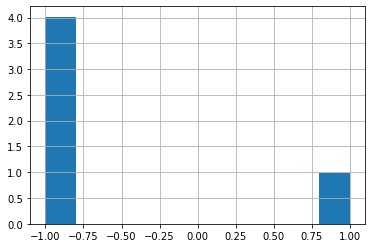

In [10]:
y_train = (train['normal.'] == 'normal.') * 2 - 1
plt.hist(y_train, density=True);
plt.grid(True)

"Отрежем" не нужные для обучения колонки и целевую переменную.

In [11]:
X_train = train.drop(train.columns[[0, 1, 2, 3, 41]], axis=1)
y_train = y_train

Посмотрим на признаки. Самый простой способ оценить их качество, это посчитать дисперсию:

In [12]:
X_train.var()

181        9.765770e+11
5450       1.091644e+09
0.1        4.453072e-05
0.2        1.817249e-02
0.3        3.036300e-05
0.4        6.116857e-01
0.5        2.408584e-04
1          1.262687e-01
0.6        3.233984e+00
0.7        1.113194e-04
0.8        6.072508e-05
0.9        4.051043e+00
0.10       9.296040e-03
0.11       1.214409e-04
0.12       1.330916e-03
0.13       0.000000e+00
0.14       0.000000e+00
0.15       1.384664e-03
8          4.543170e+04
8.1        6.067489e+04
0.00       1.449456e-01
0.00.1     1.451739e-01
0.00.2     5.364954e-02
0.00.3     5.389232e-02
1.00       1.506913e-01
0.00.4     6.757756e-03
0.00.5     2.027708e-02
9          4.191872e+03
9.1        1.124453e+04
1.00.1     1.687412e-01
0.00.6     1.193758e-02
0.11.1     2.316586e-01
0.00.7     1.775183e-03
0.00.8     1.448513e-01
0.00.9     1.450999e-01
0.00.10    5.317162e-02
0.00.11    5.296467e-02
dtype: float64

In [13]:
X_train.shape

(494020, 37)

Видим, что есть два константных признака. Их можно удалить:

In [14]:
idx = np.where(X_train.var() == 0)[0]
cols = X_train.columns[idx]
X_train.drop(cols, axis=1, inplace=True)

Следующее, что можно сделать, это посмотреть попарные корреляции признаков:

<Figure size 360x360 with 0 Axes>

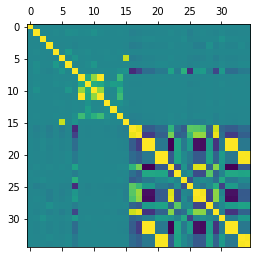

In [15]:
plt.figure(figsize=(5,5));
plt.matshow(X_train.corr());

Такая структура обещает эффективное снижение размерности.

### Задание 1 [1 балл] <a id="task2_1"></a>
Оцените с помощью randomized SVD количество компонент достаточных для сжатия и дальнейшего ускорения обучения. (randomized SVD - быстрый способ оценки количества компонент)

In [ ]:
X_train = np.array(X_train)
look_on_components =  # your code here
U, Sigma, VT =  # your code here
plt.plot(Sigma);

### Задание 2 [1 балл] <a id="task2_2"></a>

Выберите количество компонент для сжатия и примените **truncated SVD**

In [ ]:
model =  # your code here
X_train_proj =  # your code here

### Задание 3 [3 балла] <a id="task2_3"></a>

Проведите подбор параметров $\nu$ и $\gamma$ для модели OneClassSVM.

Подбор сразу двух параметров может быть затруднен с вычислительной точки зрения (занимает много времени на слабых ПК). В таком случае возможны два выхода:

1) Проводить раздельный подбор гиперпараматров. Сначала поиск по $\nu$, затем при оптимальном $\nu_{opt}$ провести поиск по $\gamma$

2) Уменьшить размер датасета

Поиск параметров предллагается провести в следующей области параметров:

$\nu$: [0.5,1]

$\gamma$: [0.1, 1]


In [ ]:
# количество обьектов для сокращения выборки
# перед уменьшением выборки дайте шанс обучению на полном датасете
subsample_N = X_train_proj.shape[0] # вместо этого укажите свое N

X_subsample = X_train_proj[0:subsample_N]
y_subsample = y_train[0:subsample_N]

print(X_train_proj.shape)
print(X_subsample.shape)

#### Проведем поиск по первому параметру $\nu$:

In [ ]:
scores = {'accuracy_score': make_scorer(accuracy_score),}

model =  # your code here

grid = {
    'nu':  # your code here
}

search = GridSearchCV(model, grid, scoring=scores,
                      n_jobs=-1, cv=2,
                      refit='accuracy_score')

search.fit(X_subsample, y_subsample)

#### Построим результаты валидации:

In [ ]:
 # your code here
print("nu:     ", search.cv_results_['param_nu'].data)
print("scores: ", search.cv_results_['mean_test_accuracy_score'])

Выберите $\nu$, обеспечивающее наибольший score на кроссвалидации, за исключением $\nu=1$, т.к. это противоречит физическому смыслу задачи

In [ ]:
score =  # your code here

nu_opt = score[score < 0.8].max()
print(nu_opt)

Теперь необходимо подобрать $\gamma$. Оптимальнее конечно было бы подбирать сразу оба параметра, но если это не возможно для ваших ресурсов в силу вычислительной сложности, то проведите отдельный поиск $\gamma$ при найденном ранее $\nu_{opt}$.

# Задание 
+ Используя кроссвалидацию оценить качество определения аномальных наблюдений с помощью обученной модели One-Class SVM 
+ Исследовать зависимость этого качества от параметров метода (ширина ядра, доля выбросов в модели, задаваемая параметром $\nu$)

In [ ]:
model = # your code here

grid = {
    'gamma': # your code here
}

search = GridSearchCV(model, grid, scoring=scores,
                      n_jobs=-1, cv=2,
                      refit='accuracy_score')

search.fit(X_subsample, y_subsample)

In [ ]:
# your code here
print("gamma:     ", search.cv_results_['param_gamma'].data)
print("scores: ", search.cv_results_['mean_test_accuracy_score'])